# Twin Cities spatial clustering analysis of individual-level urban movement using Twitter and transit data
**Alysha Alloway & Lauren Strug, CyberGIS Seminar, University of Minnesota**

The goal of this project is to analyze spatial clustering of individuals using Twitter users’ geolocated tweets history and transit users’ origins and destinations, comparing the clusters of each user group to discuss whether Twitter users can be considered a relatively reliable proxy for the Twin Cities population using public transit. Transit users’ origin, meaning where a rider started their transit journey and destination meaning where the rider was headed using transit. The transit origin and destination information was accessed from the 2016 On-Board Travel Behavior Inventory survey, made freely available to the public by Metro Transit, the Twin Cities’ transit authority. 

This IPython notebook is intended to take you through the code we wrote to complete this project. We will go through the steps completed to gather point data of geolocated tweets from within our bounding box, which is the Twin Cities Metro Transit reach.  Then we will introduce how we created K-Means clusters of Origin/Destination transit user data and geolocated tweets and validated the K number of K-Means clusters using the Elbow Method. 

## Twitter Data Processing
The code below take the the ***user-list-metro*** csv provided from Eric's twitter data base which includes 339,602 users that tweeted geo-located tweets within our bounding box. This list of users includes duplicates (each time a user tweets a geolocated tweet in our bounding box). The ***user-list-metro*** csv file is included with this notebook and can be used to run the code.

The sequence of events:
1.   Read ***user-list-metro*** csv into a pandas dataframe to remove duplicates
2.   Use Twitter REST API to gather the user timelines for each unique Twitter user.



In [0]:
# Import TwitterAPI package
from TwitterAPI import TwitterAPI

# In order to stream or download tweets from Twitter's API, you need to gain access with your developer key information

# Consumer Key and Consumer Secret below belong to Lauren Strug 
consumer_key = "tDajrKUelGd5RIL7qj60T4pVQ"
consumer_secret = "bXgGT0AXG4V6eOuxacMh2PfFjAALL9IBQR8ETJs2nadeI0n81P"

# Access Key and Access Secret below belong to Lauren Strug 
access_token_key = "95507296-S6g8DEzNE7DHPciaD77EmlfA6QurIS5KfQyXL1pph"
access_token_secret = "0yGMoofQCzHFVbHxxR0waXnIifZf2zZc75tTJnHXfSkqx"

print("Starting TwitterAPI")
api = TwitterAPI(consumer_key, consumer_secret, access_token_key, access_token_secret)

In [0]:
# Import pandas package to read csv as a dataframe
import pandas as pd

# Starting from full list of metro users with duplicates
# Update the file path in quotes to where "user-list-metro.csv" is stored on your machine
# Example: "C:\Users\YourName\Downloads\Folder\user-list-metro.csv"
users_input = "user-list-metro.csv"

# Read into pandas dataframe
data = pd.read_csv('user-list-metro.csv')

In [0]:
# Display the first 5 rows of the csv
data.head()

In [0]:
# Create a list of the first column, which is a list of the usernames 
user_list = list(data.username)

# Find out how many users we have (with duplicates), end up with 339,602
print(len(user_list))

In [0]:
# Remove duplicate names from the list of users, end up with 22,399
# Stored as a list
needed_users = list(dict.fromkeys(needed_users))
print(len(needed_users))

In [0]:
needed_users = list(dict.fromkeys(needed_users))
print(len(needed_users))

In [0]:
""" This is a function to get all of the tweets from a users timeline that have 
coordinates and create a JSON file as output""" 
def get_all_tweets(screen_name):
    #List to store tweets
    tweet_list = []
  
    r = api.request('statuses/user_timeline', {'screen_name': screen_name})
    for tweet in r:
        # Only grabs tweets with coordinates to append to the list
        if tweet['coordinates'] is not None:
            tweet_list.append(tweet)
    
    # Convert our tweet list to JSON
    jsonlist = json.dumps(tweet_list)

    # Set filename we will use to store our tweets, so we have multiple files
    tweets_filename = "C:/Users/laure/Desktop/tweets/" + screen_name + ".json"

    # Open tweets.json to write contents (all of our tweets)
    with open(tweets_filename, 'w') as outfile:
        json.dump(jsonlist, outfile)


    #files.download('tweets.json')
    return tweet_list

In [0]:
"""This is a function that takes in our cleaned list of users, looks in your stored folder of JSON timelines 
and outputs a list of users we haven't gotten timelines from yet"""

def get_needed_users(user_list):
    path = "C:/Users/laure/Desktop/tweets"

    #list to keep users that we haven't gotten yet
    needed_users = []
    captured_users = []

        # A loop that goes through all of the users  
    for user in user_list:
        foundUser = False        
        #TEST
        #print(user)
    
        #if user not in "desktop/tweets"
        for filename in glob.glob(os.path.join(path, '*.json')):
            
            #TEST
            #print(str(filename[30:-5]))
        
            if str(user) == str(filename[30:-5]):
                #print(user)            
                captured_users.append(user)
            
                foundUser = True
        
        if foundUser == False:
            needed_users.append(user)
            foundUser = False    
    
    #TEST lengths of lists    
    print("list size of users we haven't gotten yet ", len(needed_users))
    print("list size of users we already have ", len(captured_users))
    
    return needed_users

In [0]:
# This can be used to find the needed users list to check how many users tweets have already been gathered
get_needed_users(user_list)

In [0]:
# This executed the get_all_tweets function for every use we still need. 
for user in needed_users:
    get_all_tweets(user)

In [0]:
# Creating a csv to store all of the tweet locations and user names
path = "C:/Users/laure/Desktop/tweets/*.json" 

#Creating CSV on desktop, opening it, writing two column headers
outfile = open("C:/Users/laure/Desktop/TweetLocations.csv", "w")
csvfile = csv.writer(outfile)
csvfile.writerow(['user','coordinates'])

for file in glob.glob(path): 
    with open(file, 'r') as infile:
        jsonlist = json.load(infile)
    #jsonlist = [json.loads(line) for line in infile]
    #jsonlist = tweets

    # Convert JSON string to object
    jsonlist = json.loads(jsonlist)

    # Write out each tweet as a row in the CSV file
    for tweet in jsonlist:
        if 'text' in tweet: # and 'followers_count' in tweet:
            csvfile.writerow([tweet['coordinates']['coordinates']])
outfile.close()

We ended up doing a bit of data cleaning in the csv because it was down to the wire and much quicker to remove duplicates and clean innormalities with csv functions.

In [0]:
# Filtering out all of the locations that are outside of the bounding box
with open('C:\\Users\\allow001\\Documents\\TweetLocations.csv', 'r') as fin, open('C:\\Users\\allow001\\Documents\\fout.csv', 'w', newline='') as fout:

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True, quoting=csv.QUOTE_NONNUMERIC)
    #next(reader, None)
    writer = csv.writer(fout, delimiter=',')

    # write headers
    writer.writerow(next(reader))

    # iterate and write rows based on condition
    for i in reader:
        if i[0] >= -93.795776 and i[0] <= -92.886658 and i[1] >= 44.717953 and i[1] <= 45.344424:
            writer.writerow(i)

## K-Means and Elbow Method: Processing both Transit and Twitter data
### We used the same code, just changing variables for doing the elbow method and kmeans on all three data portions (origins, destinations, tweets.) The code snippets below are from tweet processing

In [0]:
#Import statements

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [0]:
#Uploading the data from my local drive

from google.colab import files
uploaded = files.upload()

Saving TBI_2016_TransitOnBoardSurvey.csv to TBI_2016_TransitOnBoardSurvey (3).csv


In [0]:
#Reading in the data as a pandas array

import io
data = pd.read_csv(io.BytesIO(uploaded['TBI_2016_TransitOnBoardSurvey (3).csv']))

KeyError: ignored

In [0]:
#A check step for me to know which columns I am interested in for each dataset

#print(data.shape)
print(data.columns.values)

['ID' 'DATE' 'ROUTE_SURVEYED_CODE' 'ROUTE_SURVEYED'
 'HOME_OR_HOTEL_ADDR_CITY' 'HOME_OR_HOTEL_ADDR_STATE'
 'HOME_OR_HOTEL_ADDR_ZIP' 'HOME_OR_HOTEL_ADDR_LAT_100M'
 'HOME_OR_HOTEL_ADDR_LON_100M' 'BOARDING_LOCATION' 'BOARDING_STOPID'
 'BOARDING_LAT' 'BOARDING_LON' 'TRANSFERS_FROM_CODE' 'TRANSFERS_FROM'
 'TRANSFERS_FROM_FIRST_CODE' 'TRANSFERS_FROM_FIRST'
 'TRANSFERS_FROM_FIRST_OTHER' 'TRANSFERS_FROM_SECOND_CODE'
 'TRANSFERS_FROM_SECOND' 'TRANSFERS_FROM_SECOND_OTHER'
 'TRANSFERS_FROM_THIRD_CODE' 'TRANSFERS_FROM_THIRD'
 'TRANSFERS_FROM_THIRD_OTHER' 'TRANSFERS_FROM_FOURTH_CODE'
 'TRANSFERS_FROM_FOURTH' 'ORIGIN_PLACE_TYPE_CODE' 'ORIGIN_PLACE_TYPE'
 'ORIGIN_CITY' 'ORIGIN_STATE' 'ORIGIN_ZIP' 'ORIGIN_LAT_100M'
 'ORIGIN_LON_100M' 'ACCESS_MODE_CODE' 'ACCESS_MODE'
 'VEHICLE_ACCESS_PARK_YN_PNR_CODE' 'VEHICLE_ACCESS_PARK_YN_PNR'
 'VEHICLE_ACCESS_PARK_PNR_CODE' 'VEHICLE_ACCESS_PARK_PNR'
 'VEHICLE_ACCESS_PARK_PNR_OTHER' 'VEHICLE_ACCESS_DROPOFF'
 'VEHICLE_ACCESS_DROPOFF_CITY' 'VEHICLE_ACCESS_DROPOFF_STAT

In [0]:
#ORIGIN_LAT_100M is y
#ORIGIN_LON_100M is x

# Convert X and Y columns to float
data['ORIGIN_LON_100M'] = data['ORIGIN_LON_100M'].astype(float)
data['ORIGIN_LAT_100M'] = data['ORIGIN_LAT_100M'].astype(float)



In [0]:
#drops nulls and converts to numpy array


data = data.dropna(subset=['ORIGIN_LON_100M'])
data = data.dropna(subset=['ORIGIN_LAT_100M'])
XO = data['ORIGIN_LON_100M'].values
YO = data['ORIGIN_LAT_100M'].values
my_array = np.array(list(zip(XO,YO)))
print(my_array)




[[-93.299  44.948]
 [-93.246  44.955]
 [-93.258  44.957]
 ...
 [-93.27   44.976]
 [-93.269  44.973]
 [-93.266  44.977]]


Text(0.5, 1.0, 'Tweet Locations for Users Who Tweeted From the Twin Cities Atleast Once')

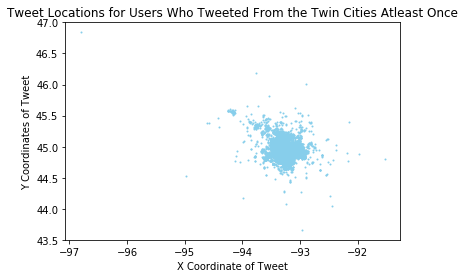

In [0]:
#Plotting the data with random centroids to start exploring it 

#Number of clusters for the random centroids
k =2
#x coords of random centroids
C_x = np.random.randint(0,np.max(my_array)-5, size = k)
#y coords of random centroids
C_y = np.random.randint(0,np.max(my_array)-5,size=k)

C = np.array(list(zip(C_x,C_y)), dtype = np.float32)


#plotting data and centroids 
plt.scatter(XO,YO, c = '#87ceeb', s = 1)
plt.xlabel("X Coordinate of Tweet")
plt.ylabel("Y Coordinates of Tweet")
plt.title("Tweet Locations for Users Who Tweeted From the Twin Cities Atleast Once")



Text(0.5, 1.0, 'Tweets: K number of clusters=6')

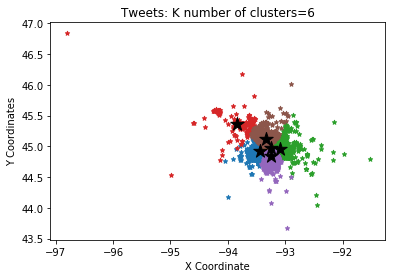

In [0]:
#We looked at different k values to explore the data

k = 6

kmeans = KMeans(n_clusters = k)

kmeans = kmeans.fit(my_array)

labels = kmeans.predict(my_array)

centroids = kmeans.cluster_centers_

colors = ['r','g','b','y','c','m','o','w']
fig2 = plt.figure()
kx = fig2.add_subplot(111)

for i in range (k):
  points = np.array([my_array[j] for j in range(len(my_array)) if labels[j] == i])
  kx.scatter(points[:,0],points[:,1], marker = '*', s = 20, cmap ='rainbow')

kx.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 200, c ='#000000')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinates")
plt.title('Tweets: K number of clusters={}'.format(k))

In [0]:
#import statements for plotting K-Means and elbow figures

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!apt-get -qq install libgeos-dev
!pip install -qq https://github.com/matplotlib/basemap/archive/master.zip
!pip install -qq pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     | 133.2MB 174kB/s
     |████████████████████████████████| 9.8MB 2.7MB/s 
     |████████████████████████████████| 225kB 51.2MB/s 
     |████████████████████████████████| 2.8MB 2.9MB/s 


In [0]:
#setting up the map plots

def plot_points_map(ax, data):
    # determine range to print based on min, max lat and lon of the data
    lat = list(data['Y'])
    lon = list(data['X'])
    margin = 0.2 # buffer to add to the range for plotting
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'c',)

     
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()    
    
    # plot points
    clist = list(data['cluster'].unique())
    if -1 in clist:
        clist.remove(-1)
    k = len(clist)
    colors = iter(cm.Set1(np.linspace(0, 1, max(10, k))))
    for i in range(k):
        color = next(colors)
        df = data.loc[data['cluster'] == clist[i]]        
        #print("Cluster {} has {} samples.".format(clist[i], df.shape[0]))
        
        # convert lat and lon to map projection coordinates
        lons, lats = m(list(df['X']), list(df['Y']))        
        ax.scatter(lons, lats, marker = 'o', color=color, edgecolor='gray', zorder=5, alpha=1.0, s=15)

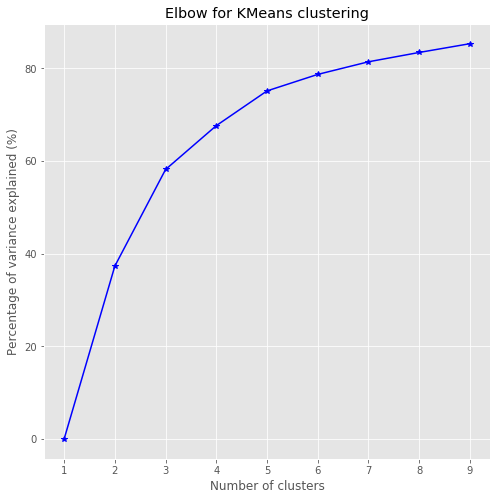

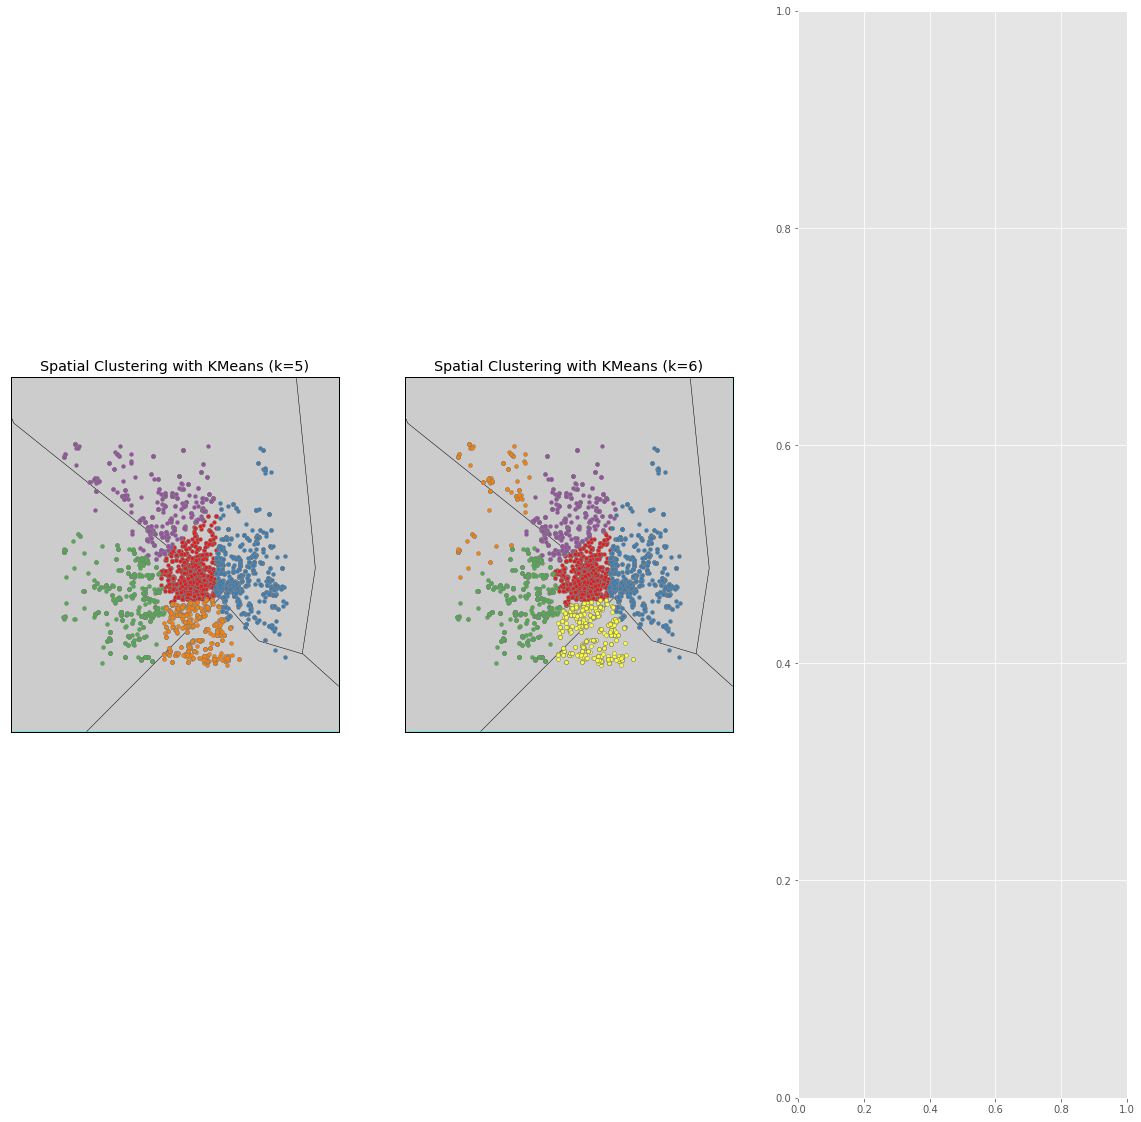

In [0]:
X = data[['Y', 'X']].values

#Parameters:
#- k     (Number of clusters)
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]


#Elbow Method
#The Elbow method is a method of validation for finding the correct number of clusters (k) in a K-Means model

def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)


# Using different K-number of clusters, plot K-means clustering


k = [5,6] #number of clusters
n = len(k)
plt.subplots(nrows=1, ncols=3, figsize=(20,20)) #controls kmeans plots

#plotting out each k-means result for the specificed number of clusters

for i in range(n):
    est = kmean[k[i]-1]
    data['cluster'] = est.predict(X).tolist()
    
    ax = plt.subplot(1, 3, i+1)
    ax.set_title("Spatial Clustering with KMeans (k={})".format(k[i]))

    plot_points_map(ax, data)